#**ICE**


Individual Conditional Expectation (ICE) plots show how the prediction changes for an individual observation when a feature's value varies, holding all other features constant. They are a useful tool for understanding model behavior at the individual level, complementing global interpretation methods like Partial Dependence Plots (PDP).

To generate an ICE plot for the 'mean radius' feature of the breast cancer dataset using a logistic regression model, follow these steps:

- Load the dataset.
- Preprocess the data (e.g., scale features if necessary).
- Train a logistic regression model.
- Generate ICE plot data for 'mean radius'.
- Plot the ICE curve.

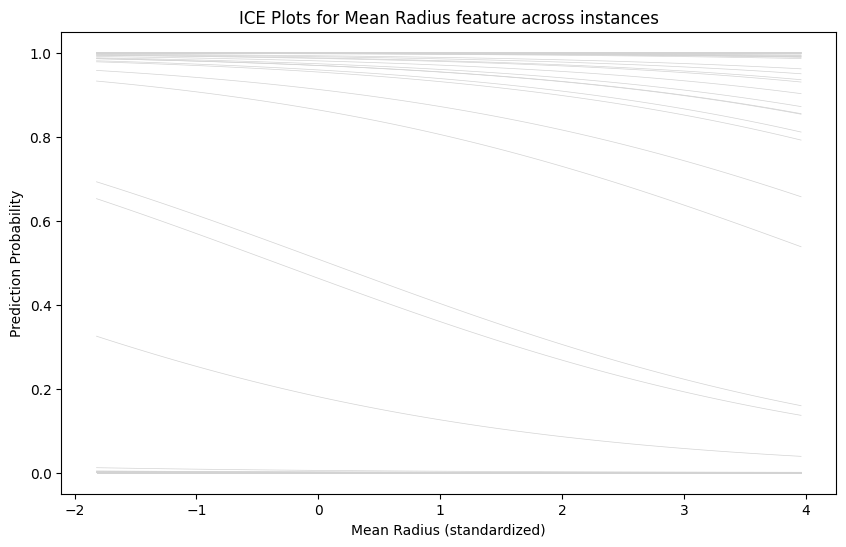

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Feature names
feature_names = data.feature_names

# Index of 'mean radius'
index_of_mean_radius = np.where(feature_names == 'mean radius')[0][0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

# Generate ICE plot data for 'mean radius'
# Here we select a subset of instances for clarity; adjust the range as needed
subset_indices = np.random.choice(len(X_test_scaled), 50, replace=False)  # Example: 50 random instances

mean_radius_values = np.linspace(X_train_scaled[:, index_of_mean_radius].min(), X_train_scaled[:, index_of_mean_radius].max(), 100)

plt.figure(figsize=(10, 6))

for idx in subset_indices:
    instance = X_test_scaled[idx]
    predictions = []
    for value in mean_radius_values:
        instance_copy = instance.copy()
        instance_copy[index_of_mean_radius] = value
        prediction = model.predict_proba(instance_copy.reshape(1, -1))[0][1]  # Probability of class 1
        predictions.append(prediction)
    plt.plot(mean_radius_values, predictions, color='lightgray', linewidth=0.5)  # Plot each instance's ICE curve

plt.xlabel('Mean Radius (standardized)')
plt.ylabel('Prediction Probability')
plt.title('ICE Plots for Mean Radius feature across instances')
plt.show()

